In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review

In [3]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

_________

In [7]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.sample(6).show()

**Linear Fit**

$\text{estimate of median income} = a \cdot \text{pctClinton} + b$

Detour: remember ecological correlations?

In [8]:
predict_voting = demographics.select('Median Income', 'Percent voting for Clinton')
predict_voting = predict_voting.with_columns('Fitted',
    fitted_values(demographics, 'Median Income', 'Percent voting for Clinton'))

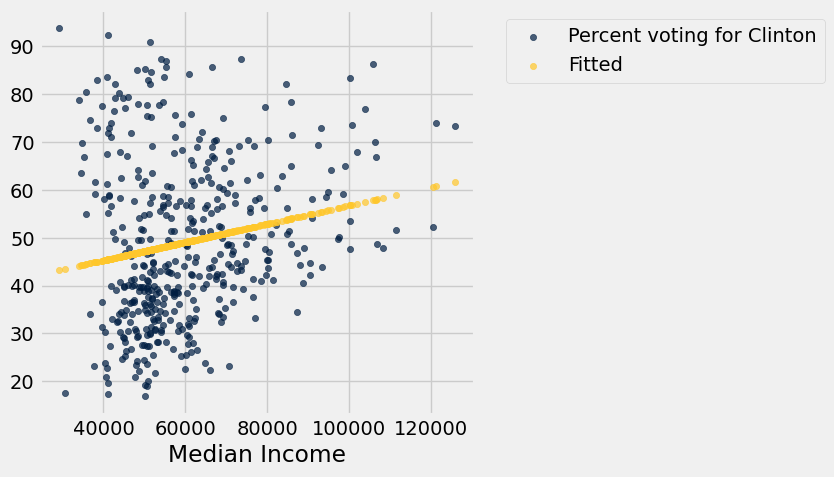

In [9]:
predict_voting.scatter('Median Income')

$\text{estimate of median income} = a \cdot \text{pctCollege} + b$

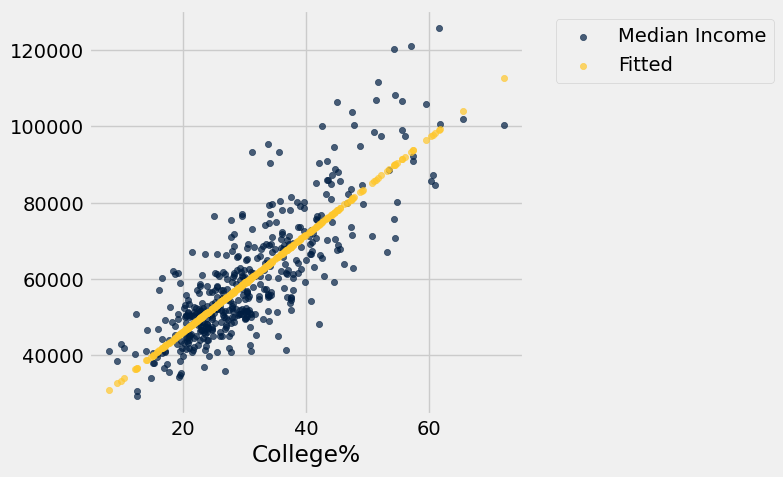

In [10]:
predict_income = demographics.select('College%', 'Median Income')
predict_income = predict_income.with_columns('Fitted',
    fitted_values(demographics, 'College%', 'Median Income'))
predict_income.scatter('College%')

## New material

In [11]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

### Residual plots can tell us about our model fit

#### Case study 1: 2016 election

In [12]:
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

In [13]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics.show(5)

These two functions will help us plot things the rest of the way.

In [14]:
def plot_fitted(t,x,y):
    tbl = t.with_columns('Fitted', fitted_values(t, x, y))
    tbl.select(x, y, 'Fitted').scatter(0)

In [16]:
def plot_residuals(t, x, y):
    tbl = t.with_columns('Residual', residuals(t, x, y))
    tbl.scatter(x, 'Residual')

______

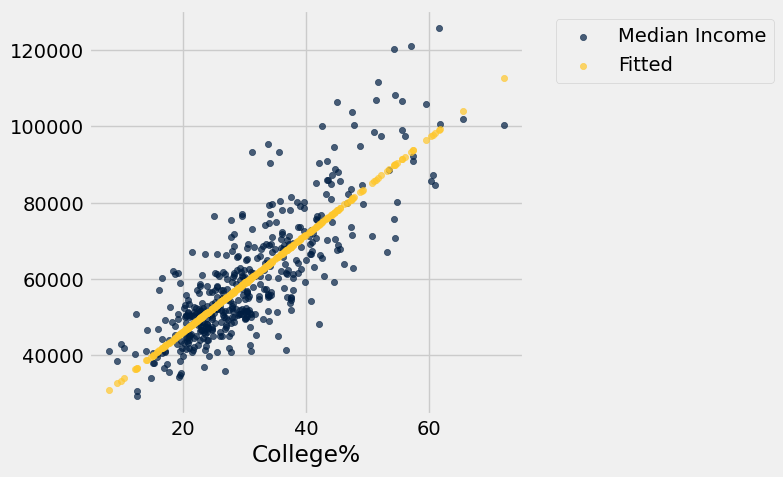

In [17]:
plot_fitted(demographics, 'College%', 'Median Income')

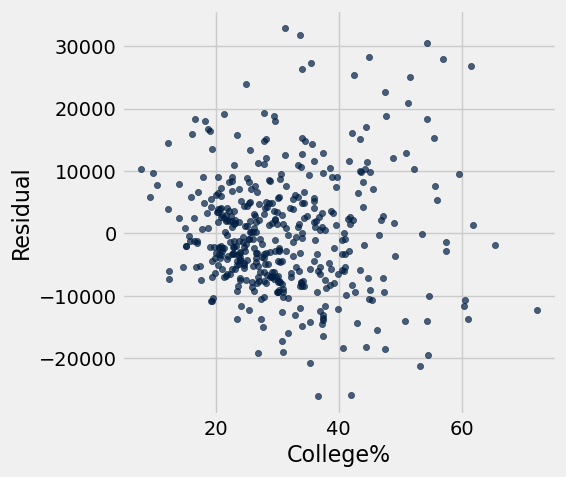

In [18]:
plot_residuals(demographics, 'College%', 'Median Income')

#### Case study 2: dugongs 

In [19]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

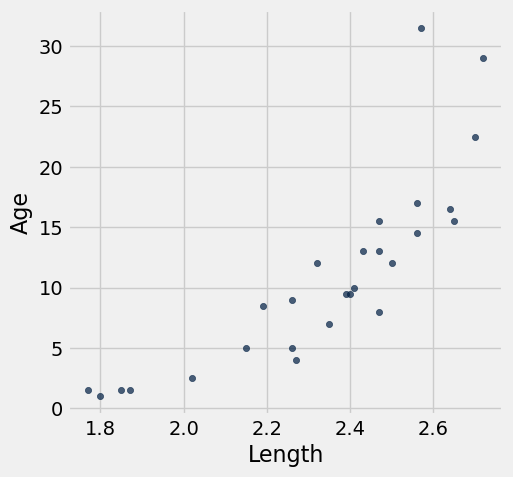

In [20]:
dugong.scatter('Length', 'Age')

In [21]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

$\text{estimate of age} = a \cdot \text{length} + b$

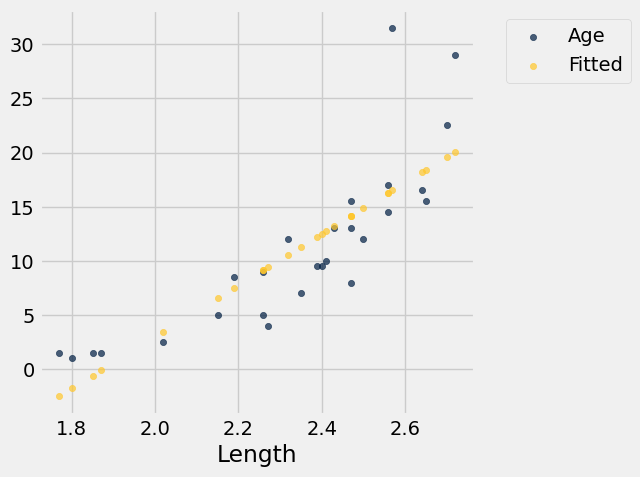

In [22]:
plot_fitted(dugong, 'Length', 'Age')

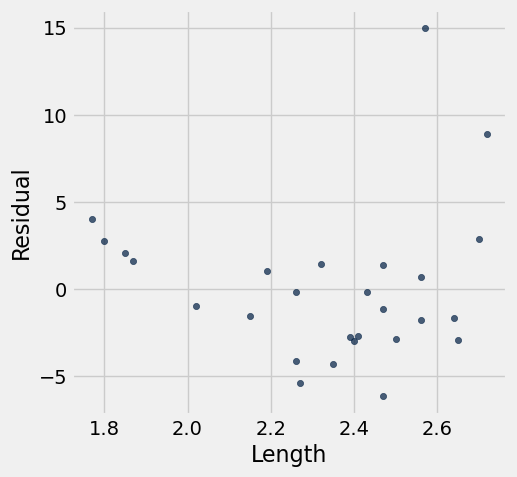

In [23]:
plot_residuals(dugong, 'Length', 'Age')

#### Case study 3: US women

In [24]:
us_women = Table.read_table('us_women.csv')
us_women.show(5)

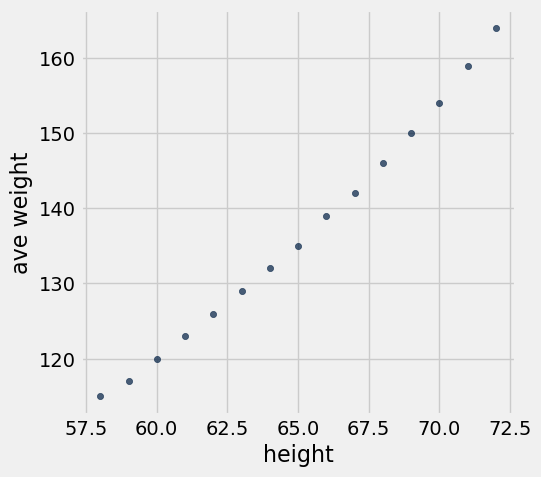

In [25]:
us_women.scatter('height')

In [26]:
correlation(us_women, 'height', 'ave weight')

0.99549476778421608

$\text{estimate of height} = a \cdot \text{average weight} + b$

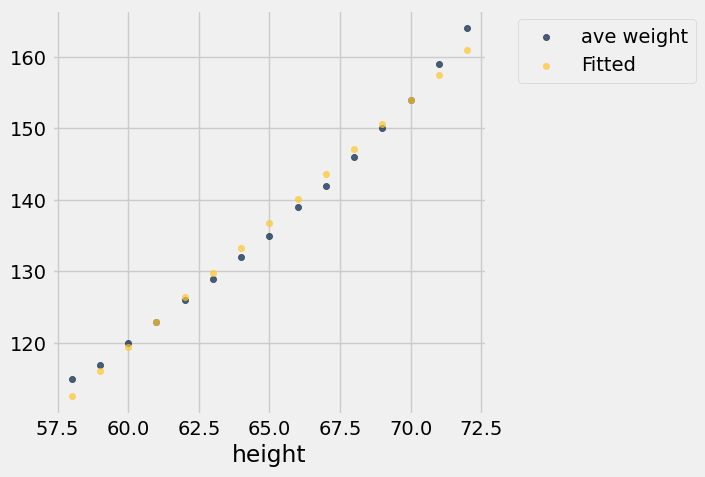

In [27]:
plot_fitted(us_women, 'height', 'ave weight')

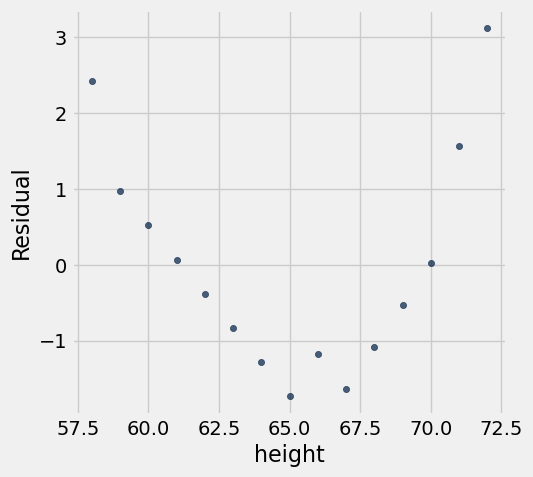

In [28]:
plot_residuals(us_women, 'height', 'ave weight')

#### Case study 4: Heights

In [29]:
family_heights = Table.read_table('family_heights.csv')
family_heights.where('family', '1')

family | father | mother | child | children | order | sex
1      | 78.5   | 67     | 73.2  | 4        | 1     | male
1      | 78.5   | 67     | 69.2  | 4        | 2     | female
1      | 78.5   | 67     | 69    | 4        | 3     | female
1      | 78.5   | 67     | 69    | 4        | 4     | female

In [31]:
parents = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parents,
    'Child', family_heights.column('child')
    )
heights.show(6)

$\text{estimate of a child's adult height} = a \cdot \text{average parent height} + b$

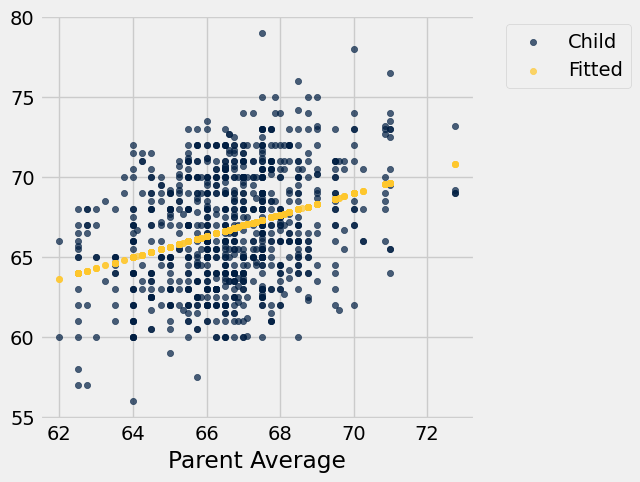

In [32]:
plot_fitted(heights, 'Parent Average', 'Child')

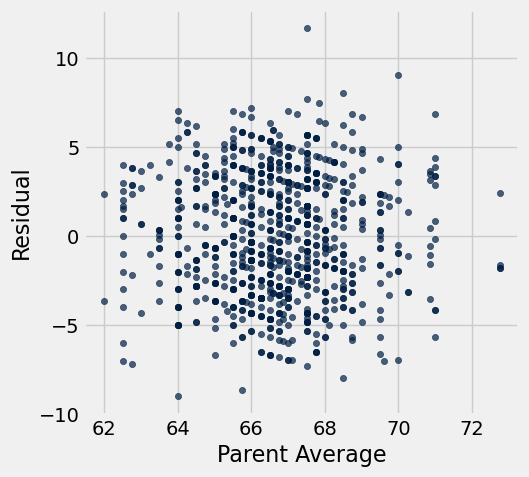

In [33]:
plot_residuals(heights, 'Parent Average', 'Child')

### Residuals have some special properties!

 The average of the residuals are zero.

In [34]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

In [35]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [36]:
round(np.average(residuals(heights, 'Parent Average', 'Child')), 6)

0.0

______

The correlation coefficients between:

- The residuals and $x$
- The residuals and the fitted values

are both 0.

In [37]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'Parent Average', 'Child'),
    'Fitted Value', fitted_values(heights, 'Parent Average', 'Child')
)

In [38]:
round(correlation(heights, 'Parent Average', 'Residual'), 6)

0.0

In [39]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

0.0

#### Discussion Question 3

In [40]:
def plot_fitted_bad(t,x,y):
    tbl = t.with_columns('Fitted', fitted_values(t, x, y) - 5)
    tbl.select(x, y, 'Fitted').scatter(0)

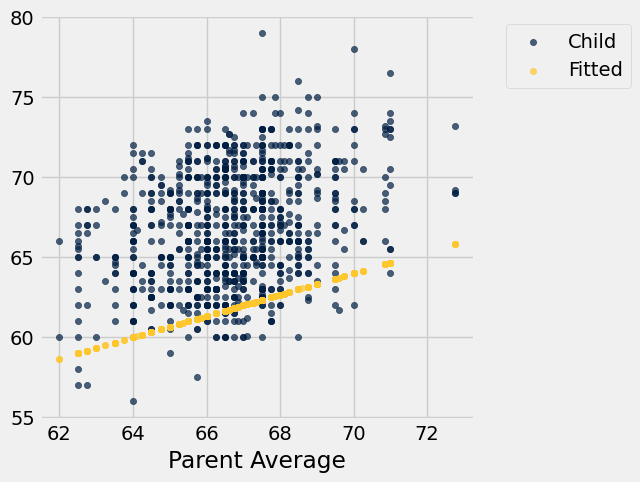

In [41]:
plot_fitted_bad(heights, 'Parent Average', 'Child')